In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os
import jax
# from d4rl.kitchen.kitchen_envs import KitchenBase
import mj_envs.envs.relay_kitchen
import gym
# use cpu
os.environ['JAX_PLATFORM_NAME'] = 'cpu'
jax.config.update('jax_platform_name', 'cpu')
os.environ['CUDA_VISIBLE_DEVICES'] = ''

RS:> Registering Arms Envs


/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_robohive/lib/python3.9/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


Choosing the latest nvidia driver: /usr/lib/nvidia-465, among ['/usr/lib/nvidia-375', '/usr/lib/nvidia-465']
Choosing the latest nvidia driver: /usr/lib/nvidia-465, among ['/usr/lib/nvidia-375', '/usr/lib/nvidia-465']
RS:> Registering Biomechanics Envs
RS:> Registering Hand Envs
RS:> Registering Kitchen Envs


In [2]:
fpath = "/nfs/kun2/users/dibya/gc_pretraining/buffers/r3m_dibya/final_paths_multiview_rb_200/left_cap2/kitchen_micro_open-v3.pickle"
ds = pickle.load(open(fpath, 'rb'))
traj1 = ds[1]
actions = traj1['actions']
N = len(actions)
print("Rewards", traj1['rewards'])
print("Success", traj1['env_infos']['solved'].astype(float))

Rewards [-0.9733 -0.9935 -0.9691 -0.9564 -0.9502 -0.9433 -0.9332 -0.9197 -0.9114
 -0.902  -0.897  -0.8782 -0.8709 -0.8599 -0.8534 -0.8503 -0.8335 -0.8279
 -0.8153 -0.8185 -0.8188 -0.8196 -0.8024 -0.7698 -0.7186 -0.6868 -0.6566
 -0.5329 -0.4161 -0.2761  0.3641  0.397   0.4564  0.5984  0.7616  0.7724
  0.7377  0.7469  0.7298  0.7699  0.7342  0.779   0.8131  0.8127  0.8098
  0.8355  0.8461  0.8589  0.8671  0.8273]
Success [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_robohive/lib/python3.9/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/dashora7/mj_envs/mj_envs/envs/env_base.py:131: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.rwd_dict = self.get_reward_dict(self.obs_dict)


Found 8 GPUs for rendering. Using device 0.


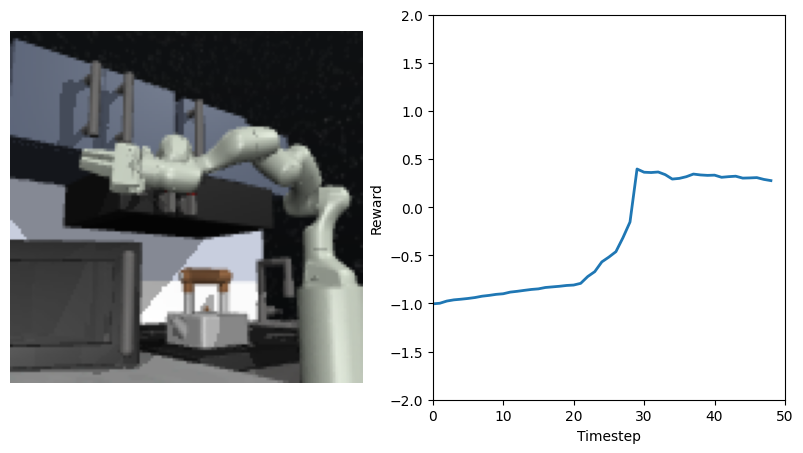

In [3]:
env = gym.make('kitchen_micro_open-v3')
obs = env.reset()
def get_img(environment):
    img = environment.sim.render(
        width=128, height=128, depth=False, camera_name="left_cap2", device_id=-1)
    img = img[::-1,:,:]
    return img

im_obses = [get_img(env)]
rews = []

# show a video of the trajectory along with a plot of the ICVF
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_axis_off()
ax[1].set_xlim(0, 50)
ax[1].set_ylim(-2, 2)
ax[1].set_xlabel("Timestep")
ax[1].set_ylabel("Reward")

for i in range(0, N):
    obs, reward, done, info = env.step(actions[i])
    im_obses.append(get_img(env))
    rews.append(reward)


im = ax[0].imshow(im_obses[0])
line, = ax[1].plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    im.set_array(im_obses[i])
    line.set_data(np.arange(i), rews[:i])
    return line,
ani = animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True)
HTML(ani.to_jshtml())